In [1]:
import pandas as pd
import cv2, os              
import numpy as np         
import matplotlib.pyplot as plt
from random import shuffle 
from tqdm import tqdm      

**Data loading**

In [2]:
TRAIN_DIR = '../input/train/'
TEST_DIR = '../input/test/'

train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [3]:
train_images = train_dogs + train_cats
shuffle(train_images) # mixing up the training data

In [4]:
train_images[:5] # check out the format of the raw training images labels

['../input/train/dog.342.jpg',
 '../input/train/dog.4525.jpg',
 '../input/train/dog.10740.jpg',
 '../input/train/dog.7423.jpg',
 '../input/train/cat.1723.jpg']

**One-hot transform**

In [5]:
def labeling(img):
    image_label = img.split('.')[-3].split('/')[-1] # split the raw images labels to only "dog" or "cat", then convert to an array like below:
    if image_label == 'cat': return [1,0] 
    elif image_label == 'dog': return [0,1]

**Training data processing**

In [6]:
# process the training images and their labels into arrays:
from keras import preprocessing
width = 64
height = 64
def train_data_generate():
    training_data = []
    for image in tqdm(train_images):
        label = labeling(image)
        img = preprocessing.image.load_img(image, target_size=(width, height))
        x = preprocessing.image.img_to_array(img)
        training_data.append([np.array(x), np.array(label)])
    return training_data

Using TensorFlow backend.


**Testing data processing**

In [7]:
# process the testing images and their labels into arrays:
from glob import glob
def test_data_generate():
    testing_data = []
    for image in glob('../input/test/*.*'):
        number = image.split('.')[2].split('/')[-1]
        image = preprocessing.image.load_img(image, target_size=(width, height))
        x = preprocessing.image.img_to_array(image)
        testing_data.append([np.array(x), number])
        shuffle(testing_data)
    return testing_data

In [8]:
train_data = train_data_generate()

100%|██████████| 25000/25000 [02:06<00:00, 198.02it/s]


In [9]:
# define the training data and target
X = np.array([i[0] for i in train_data])/255.0
Y = np.array([i[1] for i in train_data])

**CNN with different convolution layers**

In [10]:
#model with 2 convolution layers
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

conv1 = 32
conv1_drop = 0.2
conv2 = 64
conv2_drop = 0.2
dense1_n = 1024
dense1_drop = 0.2
dense2_n = 512
dense2_drop = 0.2
lr = 0.001

epochs = 20
batch_size = 32
color_channels = 3

def build_model_1(conv_1_drop=conv1_drop, conv_2_drop=conv2_drop, dense1_n=dense1_n, dense1_drop=dense1_drop, dense2_n=dense2_n, dense2_drop=dense2_drop):
    model_1 = Sequential()
    
    model_1.add(Convolution2D(conv1, (3, 3), input_shape=(width, height, color_channels), activation='relu'))
    model_1.add(MaxPooling2D(pool_size=(2, 2)))
    model_1.add(Dropout(conv_1_drop))
    
    model_1.add(Convolution2D(conv2, (3, 3), activation='relu'))
    model_1.add(MaxPooling2D(pool_size=(2, 2)))
    model_1.add(Dropout(conv_2_drop))
    
    model_1.add(Flatten())
    
    model_1.add(Dense(dense1_n, activation='relu'))
    model_1.add(Dropout(dense1_drop))
    
    model_1.add(Dense(dense2_n, activation='relu'))
    model_1.add(Dropout(dense2_drop))
    
    model_1.add(Dense(2, activation='softmax'))
    
    model_1.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    return model_1


In [11]:
#model with 3 convolution layers
conv3 = 128
conv3_drop = 0.2

def build_model_2(conv_1_drop=conv1_drop, conv_2_drop=conv2_drop, conv_3_drop=conv3_drop, 
                dense1_n=dense1_n, dense1_drop=dense1_drop, dense2_n=dense2_n, dense2_drop=dense2_drop):
    model_2 = Sequential()
    
    model_2.add(Convolution2D(conv1, (3, 3), input_shape=(width, height, color_channels), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(Dropout(conv_1_drop))
    
    model_2.add(Convolution2D(conv2, (3, 3), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(Dropout(conv_2_drop))
    
    model_2.add(Convolution2D(conv3, (3, 3), activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2, 2)))
    model_2.add(Dropout(conv_3_drop))
    
    model_2.add(Flatten())
    
    model_2.add(Dense(dense1_n, activation='relu'))
    model_2.add(Dropout(dense1_drop))
    
    model_2.add(Dense(dense2_n, activation='relu'))
    model_2.add(Dropout(dense2_drop))
    
    model_2.add(Dense(2, activation='softmax'))
    
    model_2.compile(loss='binary_crossentropy',
                 optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    return model_2


In [12]:
#model with 4 convolution layers
conv4 = 256
conv4_drop = 0.2

def build_model_3(conv_1_drop=conv1_drop, conv_2_drop=conv2_drop, conv_3_drop=conv3_drop, conv_4_drop=conv4_drop, 
                dense1_n=dense1_n, dense1_drop=dense1_drop, dense2_n=dense2_n, dense2_drop=dense2_drop):
    model_3 = Sequential()
    
    model_3.add(Convolution2D(conv1, (3, 3), input_shape=(width, height, color_channels), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(Dropout(conv_1_drop))
    
    model_3.add(Convolution2D(conv2, (3, 3), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(Dropout(conv_2_drop))
    
    model_3.add(Convolution2D(conv3, (3, 3), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(Dropout(conv_3_drop))
    
    model_3.add(Convolution2D(conv4, (3, 3), activation='relu'))
    model_3.add(MaxPooling2D(pool_size=(2, 2)))
    model_3.add(Dropout(conv_4_drop))
    
    model_3.add(Flatten())
    
    model_3.add(Dense(dense1_n, activation='relu'))
    model_3.add(Dropout(dense1_drop))
    
    model_3.add(Dense(dense2_n, activation='relu'))
    model_3.add(Dropout(dense2_drop))
    
    model_3.add(Dense(2, activation='softmax'))
    
    model_3.compile(loss='binary_crossentropy',
                 optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    return model_3


**Model summary**

In [13]:
model_one = build_model_1()
model_one.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [15]:
model_two = build_model_2()
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
__________

In [16]:
model_three = build_model_3()
model_three.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73856     
__________

**Model fitting**

In [17]:
model_one.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 12s 591us/step - loss: 0.6606 - acc: 0.6191 - val_loss: 0.5713 - val_acc: 0.7024
Epoch 2/20
20000/20000 [==============================] - 7s 339us/step - loss: 0.5550 - acc: 0.7160 - val_loss: 0.5048 - val_acc: 0.7542
Epoch 3/20
20000/20000 [==============================] - 7s 341us/step - loss: 0.4910 - acc: 0.7616 - val_loss: 0.4840 - val_acc: 0.7662
Epoch 4/20
20000/20000 [==============================] - 7s 338us/step - loss: 0.4369 - acc: 0.7933 - val_loss: 0.4814 - val_acc: 0.7692
Epoch 5/20
20000/20000 [==============================] - 7s 340us/step - loss: 0.3771 - acc: 0.8274 - val_loss: 0.4463 - val_acc: 0.7946
Epoch 6/20
20000/20000 [==============================] - 7s 345us/step - loss: 0.3018 - acc: 0.8684 - val_loss: 0.4687 - val_acc: 0.7854
Epoch 7/20
20000/20000 [==============================] - 7s 346us/step - 

In [18]:
model_two.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.6819 - acc: 0.5530 - val_loss: 0.6185 - val_acc: 0.6598
Epoch 2/20
20000/20000 [==============================] - 6s 286us/step - loss: 0.5827 - acc: 0.6920 - val_loss: 0.5080 - val_acc: 0.7476
Epoch 3/20
20000/20000 [==============================] - 6s 287us/step - loss: 0.5026 - acc: 0.7543 - val_loss: 0.4470 - val_acc: 0.7894
Epoch 4/20
20000/20000 [==============================] - 6s 287us/step - loss: 0.4545 - acc: 0.7852 - val_loss: 0.4253 - val_acc: 0.8040
Epoch 5/20
20000/20000 [==============================] - 6s 287us/step - loss: 0.4176 - acc: 0.8069 - val_loss: 0.4060 - val_acc: 0.8136
Epoch 6/20
20000/20000 [==============================] - 6s 286us/step - loss: 0.3875 - acc: 0.8253 - val_loss: 0.3940 - val_acc: 0.8212
Epoch 7/20
20000/20000 [==============================] - 6s 287us/step - loss: 0.3604 - acc: 0.8389 - val_loss: 0.3633 - v

In [20]:
model_three.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 6s 321us/step - loss: 0.6938 - acc: 0.5068 - val_loss: 0.6932 - val_acc: 0.5024
Epoch 2/20
20000/20000 [==============================] - 6s 275us/step - loss: 0.6915 - acc: 0.5192 - val_loss: 0.6855 - val_acc: 0.5338
Epoch 3/20
20000/20000 [==============================] - 5s 273us/step - loss: 0.6665 - acc: 0.5895 - val_loss: 0.6135 - val_acc: 0.6702
Epoch 4/20
20000/20000 [==============================] - 5s 273us/step - loss: 0.6118 - acc: 0.6744 - val_loss: 0.5650 - val_acc: 0.7074
Epoch 5/20
20000/20000 [==============================] - 5s 275us/step - loss: 0.5406 - acc: 0.7308 - val_loss: 0.4812 - val_acc: 0.7658
Epoch 6/20
20000/20000 [==============================] - 5s 272us/step - loss: 0.4881 - acc: 0.7661 - val_loss: 0.4278 - val_acc: 0.7968
Epoch 7/20
20000/20000 [==============================] - 5s 272us/step - loss: 0.4530 - acc: 0.7880 - val_loss: 0.4099 - v

In [21]:
test_data = test_data_generate()

In [22]:
test_img = np.array([i[0] for i in test_data])/255.0
test_id = np.array([i[1] for i in test_data])
test_img.shape

(12500, 64, 64, 3)

**Different models predictions and results**

In [23]:
predictions_1 = model_one.predict(test_img, verbose=1)

12500/12500 [==============================] - 1s 101us/step


I am 100.00% sure this is a Cat


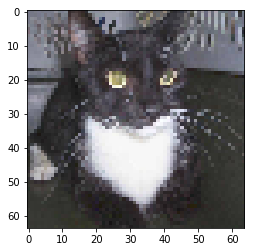

I am 99.89% sure this is a Cat


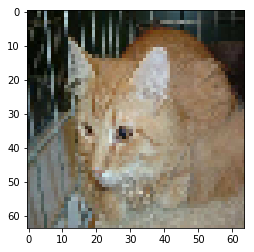

I am 100.00% sure this is a Cat


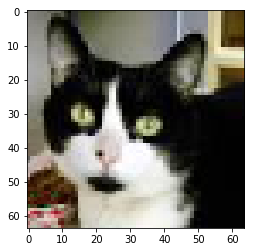

I am 86.29% sure this is a Dog


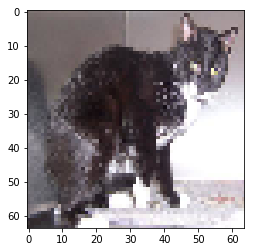

I am 100.00% sure this is a Dog


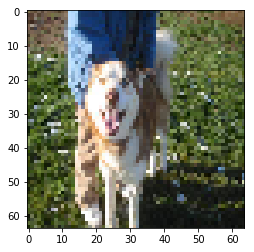

I am 99.26% sure this is a Dog


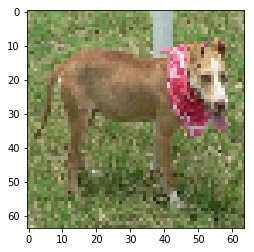

I am 100.00% sure this is a Dog


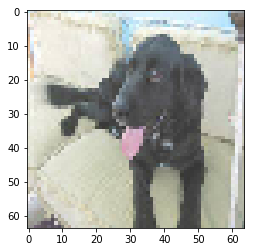

I am 100.00% sure this is a Dog


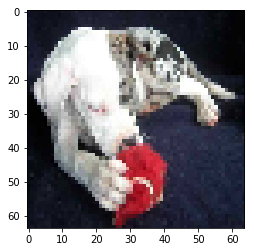

I am 98.42% sure this is a Cat


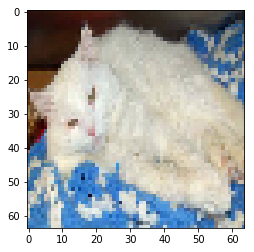

I am 91.43% sure this is a Dog


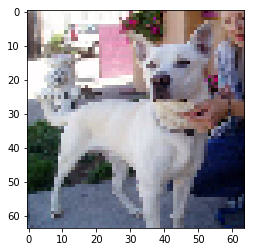

In [24]:
for i in range(0, 10):
    if predictions_1[i, 1] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions_1[i][1]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions_1[i][1]))
        
    plt.imshow(test_img[i])
    plt.show()

In [25]:
results = pd.DataFrame({
    'id': test_id,
    'label': predictions_1[:, 1]
})

results.to_csv('sample_submission_1.csv',index=False)
sub = pd.read_csv('sample_submission_1.csv')
sub.head(5)

,id,label
0,7802,1.628904e-07
1,5704,1.060301e-03
2,3271,9.188990e-15
3,1961,8.629210e-01
4,8444,9.999720e-01


In [26]:
predictions_2 = model_two.predict(test_img, verbose=1)

12500/12500 [==============================] - 1s 113us/step


I am 51.90% sure this is a Cat


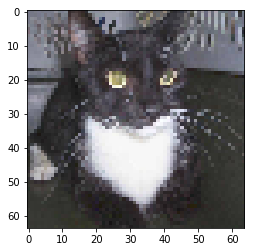

I am 65.36% sure this is a Cat


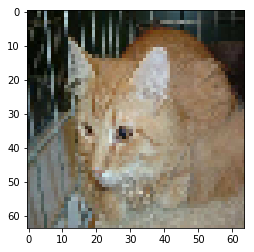

I am 100.00% sure this is a Cat


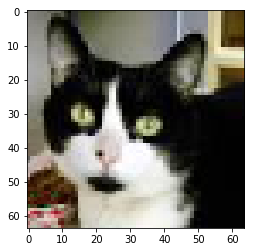

I am 62.94% sure this is a Cat


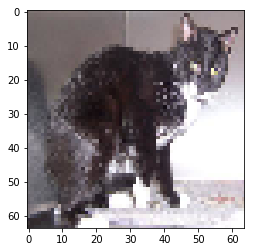

I am 100.00% sure this is a Dog


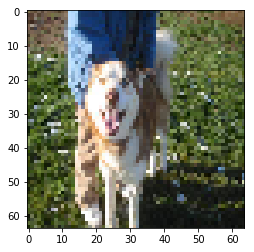

I am 100.00% sure this is a Dog


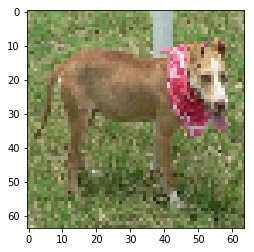

I am 99.52% sure this is a Dog


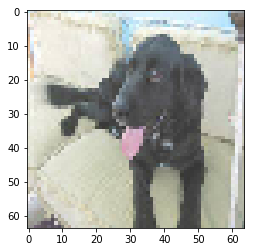

I am 99.84% sure this is a Dog


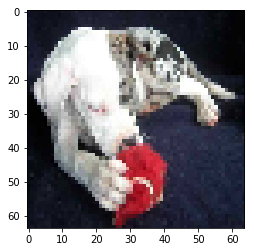

I am 82.05% sure this is a Cat


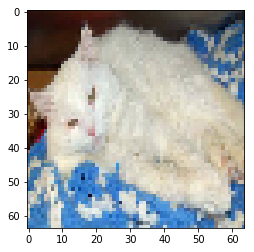

I am 99.83% sure this is a Dog


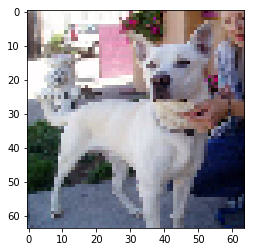

In [27]:
for i in range(0, 10):
    if predictions_2[i, 1] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions_2[i][1]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions_2[i][1]))
        
    plt.imshow(test_img[i])
    plt.show()

In [28]:
results = pd.DataFrame({
    'id': test_id,
    'label': predictions_2[:, 1]
})

results.to_csv('sample_submission_2.csv',index=False)
sub = pd.read_csv('sample_submission_2.csv')
sub.head(5)

,id,label
0,7802,0.480983
1,5704,0.346439
2,3271,0.000008
3,1961,0.370639
4,8444,1.000000


In [29]:
predictions_3 = model_three.predict(test_img, verbose=1)

12500/12500 [==============================] - 1s 103us/step


I am 99.63% sure this is a Cat


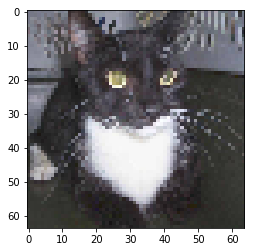

I am 97.63% sure this is a Cat


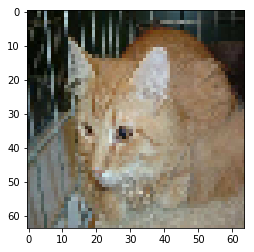

I am 100.00% sure this is a Cat


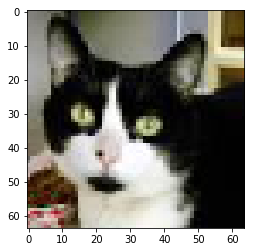

I am 59.01% sure this is a Cat


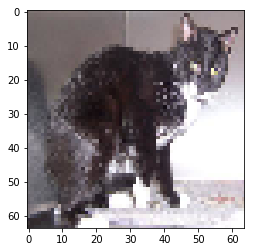

I am 96.85% sure this is a Dog


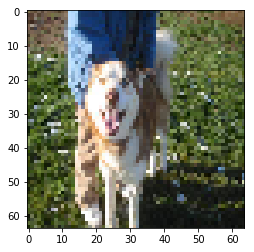

I am 98.74% sure this is a Dog


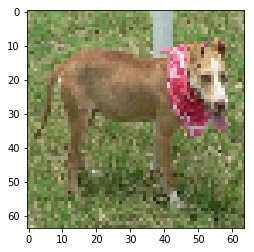

I am 85.78% sure this is a Dog


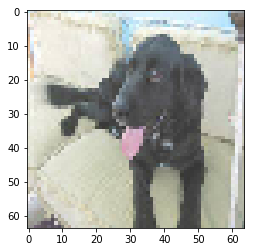

I am 94.87% sure this is a Dog


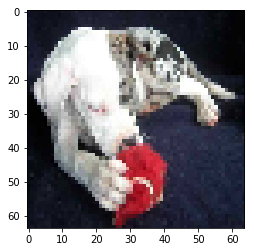

I am 67.73% sure this is a Cat


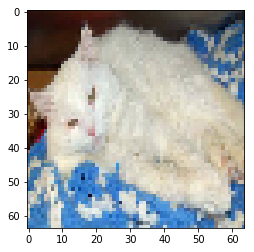

I am 99.90% sure this is a Dog


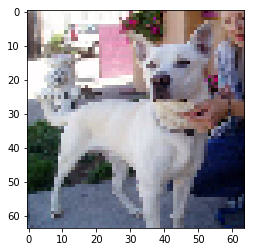

In [30]:
for i in range(0, 10):
    if predictions_3[i, 1] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions_3[i][1]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions_3[i][1]))
        
    plt.imshow(test_img[i])
    plt.show()

In [31]:
results = pd.DataFrame({
    'id': test_id,
    'label': predictions_3[:, 1]
})

results.to_csv('sample_submission_3.csv',index=False)
sub = pd.read_csv('sample_submission_3.csv')
sub.head(5)

,id,label
0,7802,0.003710
1,5704,0.023652
2,3271,0.000016
3,1961,0.409856
4,8444,0.968451
